In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [39]:
d=pd.read_csv('movies_metadata.csv')
n = d.shape[0]
m = d.shape[1]

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\2204492763.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  d=pd.read_csv('movies_metadata.csv')


In [40]:
# y = revenue, dropping the rows where y is not valid
k = []
for i in range(n):
    if d.revenue[i] == 0 :
        k += [i]
d = d.drop(k, axis = 0)

In [41]:
#importing new dataframe with valid values for y which will be used to train the model
d.to_csv("movies.csv",index=False)
d=pd.read_csv('movies.csv')
n = d.shape[0]
m = d.shape[1]
print(n,m)

7414 24


In [42]:
#dropping irrelevalent columns
d = d.drop(['id','original_title','title','imdb_id','homepage','overview','poster_path','tagline','video','status'], axis=1)
len(d.columns)

14

In [43]:
features_na = []
for features in d.columns:
    if pd.isnull(d[features]).sum()>0 or (d[features]==0).sum() > 0:
            features_na += [features]
            print(features, pd.isnull(d[features]).sum(),(d[features]==0).sum())

belongs_to_collection 5927 0
popularity 5 0
production_companies 3 0
production_countries 3 0
release_date 4 0
revenue 6 0
runtime 12 21
spoken_languages 6 0
vote_average 6 38
vote_count 6 37


In [44]:
#putting missing as a values for all the movies which dont have a sequel or standalone movies
d.belongs_to_collection = d.belongs_to_collection.fillna("'missing'")
for i in range(n):
    if d.belongs_to_collection[i] != "'missing'":
        try:
            d.belongs_to_collection[i] = (d.belongs_to_collection[i].split(',')[1]).split(':')[1]
        except:
            d.belongs_to_collection[i] = 'missing'

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\2757706491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.belongs_to_collection[i] = (d.belongs_to_collection[i].split(',')[1]).split(':')[1]
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\2757706491.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.belongs_to_collection[i] = 'missing'


In [45]:
################################ purana code
'''dataset = pd.read_csv('movies_metadata.csv')
for i in [19729,19730,35587,35586,29502,29503]:
    print(dataset.loc[i])
for i in range(n):
    if d.id[i] in [82663,'1997-08-20']:
        print(d.index())
d = d.drop(d.id in [82663,1997-08-20,2014-01-01,249260,122662,2012-09-29])
d.shape
#d.id[2]
for i in range(n) :
    if i not in [19729,19730,35587,35586,29502,29503] and type(d.spoken_languages[i]) == float:
        print(d.original_title[i],d.id[i], d.production_companies[i])'''

"dataset = pd.read_csv('movies_metadata.csv')\nfor i in [19729,19730,35587,35586,29502,29503]:\n    print(dataset.loc[i])\nfor i in range(n):\n    if d.id[i] in [82663,'1997-08-20']:\n        print(d.index())\nd = d.drop(d.id in [82663,1997-08-20,2014-01-01,249260,122662,2012-09-29])\nd.shape\n#d.id[2]\nfor i in range(n) :\n    if i not in [19729,19730,35587,35586,29502,29503] and type(d.spoken_languages[i]) == float:\n        print(d.original_title[i],d.id[i], d.production_companies[i])"

In [46]:
# adding info for dictionaries type colums where values are missing
k = 0
for i in range(n) :
    try:
        if len(d.genres[i]) == 2:
            d.genres[i] = "[{'id': -1, 'name': 'unclassified'}]"
    except:
        print(i)
    try:
        if len(d.production_countries[i]) == 2:
            d.production_countries[i] = "[{'iso_3166_1': 'NA', 'name': 'unknown'}]"
    except:
        print(i)

    try:
        if len(d.production_companies) == 2:
            d.production_companies[i] = "[{'id': -1 , 'name': 'unknown'}]"
    except:
        print(i)
    try:
        if len(d.spoken_languages[i]) == 2:
            d.spoken_languages[i] = "[{'iso_639_1': 'na', 'name': 'unknown'}]"
    except:
        print(i)

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\1954357558.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.production_countries[i] = "[{'iso_3166_1': 'NA', 'name': 'unknown'}]"
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\1954357558.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.spoken_languages[i] = "[{'iso_639_1': 'na', 'name': 'unknown'}]"
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\1954357558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

5456
5456
5457
6411
6411
6412
6786
6786
6787


In [47]:
#dropping erroneous entries
d = d.drop([5456,5457,6411,6412,6786,6787])

In [48]:
#saving the data into a new file for further processing
d.to_csv("movies.csv",index=False)
d=pd.read_csv('movies.csv')
n = d.shape[0]
m = d.shape[1]
print(n,m)

7408 14


In [49]:
d.head(2)

,adult,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,False,'Toy Story Collection',30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.7,5415.0
1,False,'missing',65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.9,2413.0


In [50]:
# retriving useful information from dictionary type columns 
for i in range(n):
    k1 = []
    k2 = []
    k3 = []
    k4 = []
    k5 = []
    for j in range(len(eval(d.genres[i]))):
        try:
            k1 += [eval(d.genres[i])[j]['name']]
        except:
            print(d.iloc[[i]])
    d.genres[i] = k1
    for j in range(len(eval(d.production_companies[i]))):
        try:
            k2 += [eval(d.production_companies[i])[j]['name']]
        except:
            print(d.iloc[[i]])
    d.production_companies[i] = k2
    for j in range(len(eval(d.production_countries[i]))):
        try: 
            k3 += [eval(d.production_countries[i])[j]['name']]
        except:
            print(d.iloc[[i]])
    d.production_countries[i] = k3
    for j in range(len(eval(d.spoken_languages[i]))):
        try:    
            k4 += [eval(d.spoken_languages[i])[j]['name']]
        except:
            print(d.iloc[[i]])
    d.spoken_languages[i] = k4

d.head(3)

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\2380315716.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.genres[i] = k1
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\2380315716.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.production_companies[i] = k2
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\2380315716.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.production_countries[i] = k3
C:\Users\Utk

,adult,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,False,'Toy Story Collection',30000000,"[Animation, Comedy, Family]",en,21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],7.7,5415.0
1,False,'missing',65000000,"[Adventure, Fantasy, Family]",en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",6.9,2413.0
2,False,'missing',16000000,"[Comedy, Drama, Romance]",en,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],6.1,34.0


In [51]:
'''c=0
for i in d.popularity:
    if i != None and type(i) != float:
        c+=1
print(c)

d.popularity = pd.to_numeric(d.popularity)
c=0
for i in d.popularity:
    if i != None and type(i) != float:
        c+=1
print(c)'''


'c=0\nfor i in d.popularity:\n    if i != None and type(i) != float:\n        c+=1\nprint(c)\n\nd.popularity = pd.to_numeric(d.popularity)\nc=0\nfor i in d.popularity:\n    if i != None and type(i) != float:\n        c+=1\nprint(c)'

In [52]:
#converting datatype of categorical columns to string
for i in [d.genres,d.production_companies, d.production_countries, d.spoken_languages]:
    for j in range(n):
        i[j] = str(i[j])
#converting the date type columns into numerical
k = []
df = d.copy(deep=True)
for i in range(n):
    try:
        df.release_date[i] = int(df.release_date[i].split('-')[0])
    except:
        k+=[i]
d = df.copy(deep=True)

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\1313756863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i[j] = str(i[j])
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\1313756863.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.release_date[i] = int(df.release_date[i].split('-')[0])


In [53]:
#converting categorical values into numerical and saving corresponding categorical values in dic
df = d.copy(deep=True)
cat = ['adult','belongs_to_collection', 'genres','original_language','production_companies', 'production_countries', 'spoken_languages']
for i in cat:
    label_encoder = preprocessing.LabelEncoder() 
    df[i]= label_encoder.fit_transform(df[i])
d = df.copy(deep=True)

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\3041515083.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(numdf.corr(),


<Axes: >

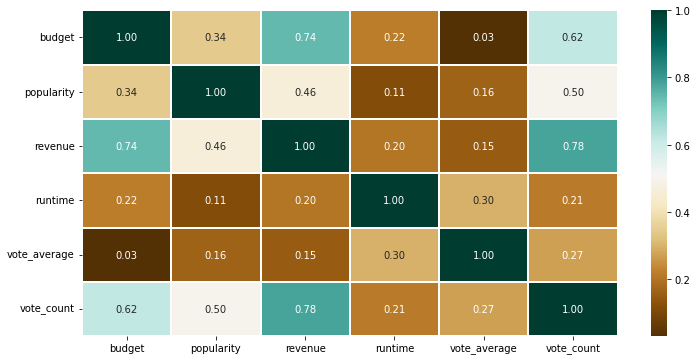

In [54]:
#Generating a correlation heatmap
plt.figure(figsize=(12,6))
numdf = df.copy(deep= True)
for i in cat:
    numdf = numdf.drop([i],axis = 1)
sns.heatmap(numdf.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\1238762730.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, index)
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\1238762730.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\1238762730.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibilit

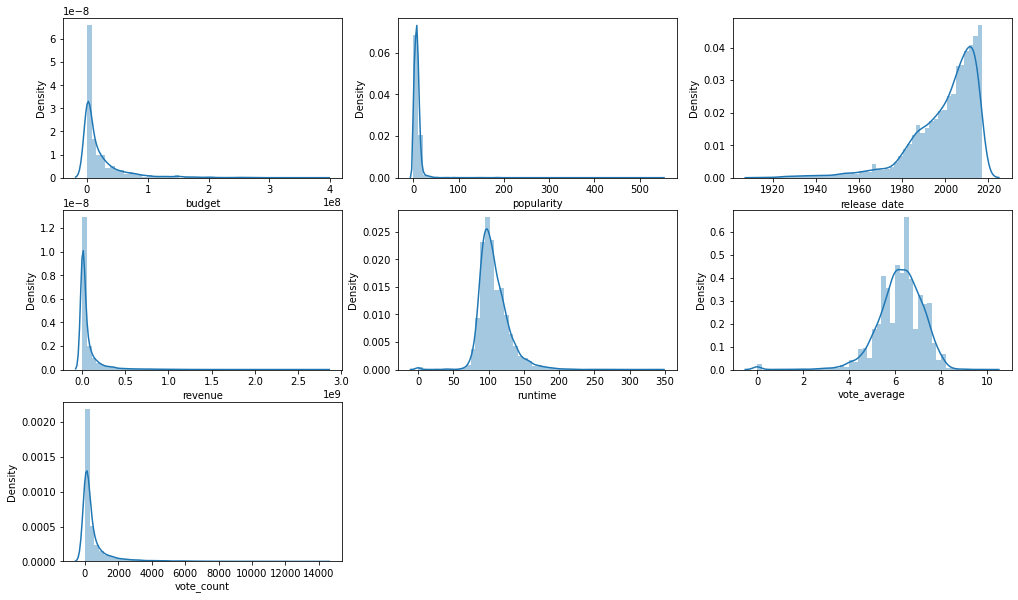

In [55]:
#generating displots for numerical categories
num = []
for i in df.columns:
      if i not in cat:
            num += [i]
plt.subplots(figsize=(17, 10))
index = 1
  
for i in num:
    plt.subplot(3, 3, index)
    sns.distplot(df[i])
    index += 1

In [56]:
#finding numerical features with na or values equal to zero
num = []
for i in df.columns:
      if i not in cat:
            num += [i]
num_na_features =[]
for features in num:
    if pd.isnull(df[features]).sum()>0 or (df[features]==0).sum() > 0:
            num_na_features += [features]
            print(features, pd.isnull(df[features]).sum(),(df[features]==0).sum())

budget 0 2027
release_date 1 0
runtime 6 21
vote_average 0 38
vote_count 0 37


In [57]:
df = d.copy(deep=True)
for i in num:
    df[i] = df[i].replace(0, np.nan)
med_num = ['budget','popularity','vote_count']
mod_num = ['release_date']
men_num = ['vote_average','runtime']
for i in num:
    if i in med_num:
        df[i].fillna(df[i].median(),inplace = True)
    elif i in mod_num:
        df[i].fillna(df[i].mode()[0],inplace = True)
    elif i in men_num:
        df[i].fillna(df[i].mean(),inplace = True)
df.isnull().any()

adult                    False
belongs_to_collection    False
budget                   False
genres                   False
original_language        False
popularity               False
production_companies     False
production_countries     False
release_date             False
revenue                  False
runtime                  False
spoken_languages         False
vote_average             False
vote_count               False
dtype: bool

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\3113619576.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, index)
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\3113619576.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_40448\3113619576.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility)

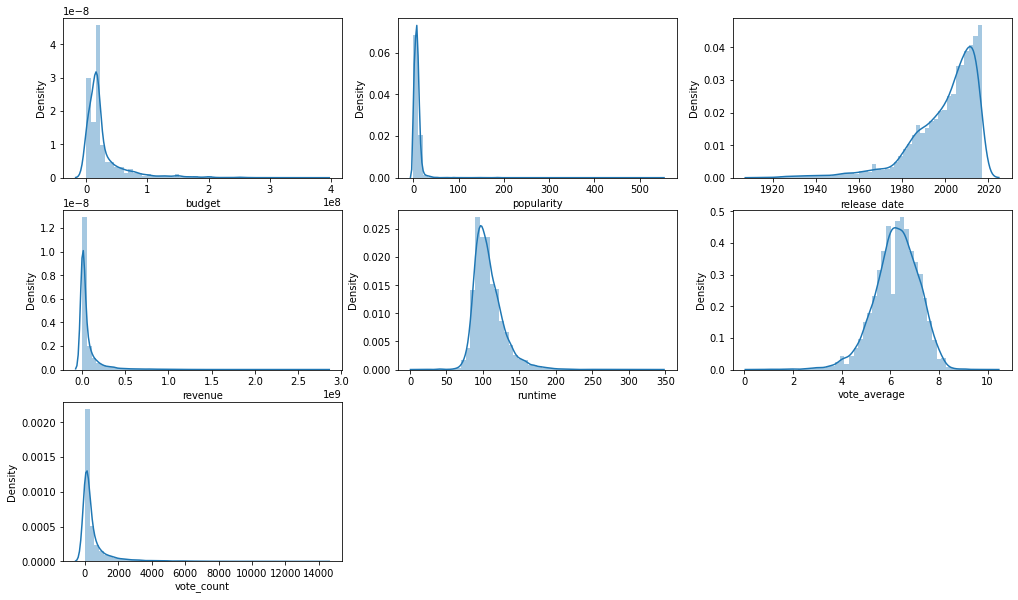

In [58]:
plt.subplots(figsize=(17, 10))
index = 1
  
for i in num:
    plt.subplot(3, 3, index)
    sns.distplot(df[i])
    index += 1

In [59]:
y = df.iloc[:,9:10].values
x = df.copy(deep = True)
x = x.drop(['revenue'], axis = 1)
x = x.iloc[:,:]

In [60]:
df.head(2)

,adult,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,0,691,30000000.0,507,10,21.946943,3457,652,1995,373554033.0,81.0,411,7.7,5415.0
1,0,748,65000000.0,447,10,17.015539,4452,652,1995,262797249.0,104.0,245,6.9,2413.0


In [61]:
#converting categorical values into numerical and saving corresponding categorical values in dic
df = d.copy(deep=True)
cat = ['belongs_to_collection', 'genres','original_language','production_companies', 'production_countries', 'spoken_languages']
cat_code = []
dic = {}
for i in cat: 
    u = df[i].unique()
    k = np.linspace(0, 5, num=len(u))
    cat_code += [k]
    dic[i] = u.tolist()
    df[i].replace(u,k, inplace = True)
df.adult.replace([False,True],[0,1],inplace=True)
cat = ['adult'] + cat
d = df.copy(deep=True)

budget 
 mean:  31094795.971380785 
 median:  17000000.0


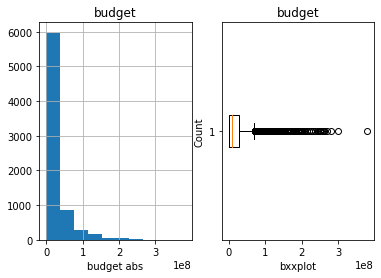

release_date 
 mean:  1999.6308896989335 
 median:  2004.0


c:\Users\Utkarsh\anaconda3.1\envs\hows_the_jose\Lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\Users\Utkarsh\anaconda3.1\envs\hows_the_jose\Lib\site-packages\matplotlib\cbook\__init__.py:1269: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\Users\Utkarsh\anaconda3.1\envs\hows_the_jose\Lib\site-packages\matplotlib\cbook\__init__.py:1277: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\Users\Utkarsh\anaconda3.1\envs\hows_the_jose\Lib\site-packages\matplotlib\cbook\__init__.py:1278: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


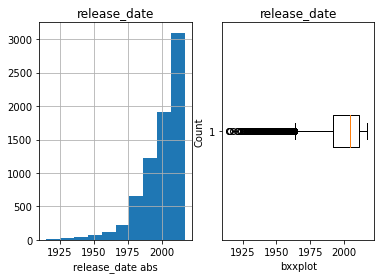

runtime 
 mean:  108.01788375558867 
 median:  104.0


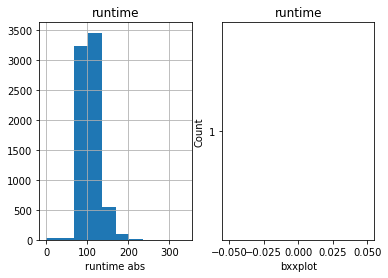

vote_average 
 mean:  6.249606512890096 
 median:  6.3


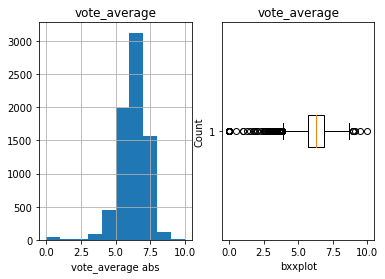

vote_count 
 mean:  562.0702754036088 
 median:  162.0


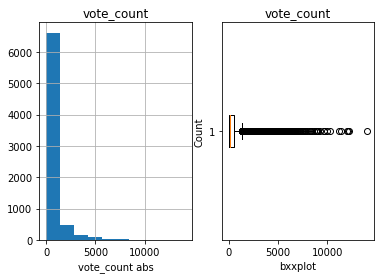

In [62]:
for f in num_na_features:
    data=df.copy()
    x = data[f]
    x = x.replace(0, np.nan)
    print(f, '\n mean: ',np.mean(x), '\n median: ', np.nanmedian(x))
    plt.subplot(121)
    data[f].hist()
    plt.xlabel(f + " abs")
    plt.title(f)
    plt.subplot(122)
    plt.boxplot(data[f], vert = False)
    plt.ylabel(f)
    plt.xlabel('bxxplot')
    plt.ylabel("Count")
    plt.title(f)
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

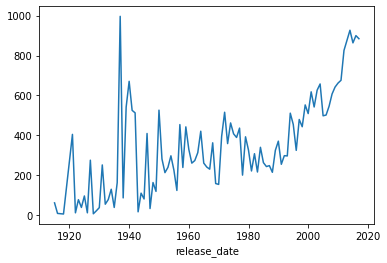

In [63]:
d.groupby(data['release_date'])['vote_count'].mean().plot()
plt.show

In [64]:
d.head(2)

,adult,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,0,0.000000,30000000,0.000000,0.0,21.946943,0.000000,0.0,1995,373554033.0,81.0,0.000000,7.7,5415.0
1,0,0.006684,65000000,0.003289,0.0,17.015539,0.000901,0.0,1995,262797249.0,104.0,0.006775,6.9,2413.0


In [65]:
df = d.copy(deep=True)
for i in df.columns:
    print(i, df[i].isnull().sum())

adult 0
belongs_to_collection 0
budget 0
genres 0
original_language 0
popularity 0
production_companies 0
production_countries 0
release_date 1
revenue 0
runtime 6
spoken_languages 0
vote_average 0
vote_count 0


In [66]:
for i in ['runtime','release_date']:
    d[i] = d[i].fillna(d[i].mean())
    print(d[i].isnull().sum())

0
0


In [ ]:
d.to_csv("cleaned.csv",index=False)